In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Load the CSV files into pandas DataFrames
lst_df_2003 = pd.read_csv('/content/LST_2003_CSV.csv')
lst_df_2010 = pd.read_csv('/content/LST_2010_CSV.csv')
lst_df_2020 = pd.read_csv('/content/LST_2020_CSV.csv')

ndvi_df_2000 = pd.read_csv('/content/NDVI_2000_CSV.csv')
ndvi_df_2010 = pd.read_csv('/content/NDVI_2010_CSV.csv')
ndvi_df_2020 = pd.read_csv('/content/NDVI_2020_CSV.csv')

ndsi_df_2000 = pd.read_csv('/content/NDSI_2000_CSV.csv')
ndsi_df_2010 = pd.read_csv('/content/NDSI_2010_CSV.csv')
ndsi_df_2020 = pd.read_csv('/content/NDSI_2000_CSV.csv')

savi_df_2003 = pd.read_csv('/content/SAVI_2003_CSV.csv')
savi_df_2010 = pd.read_csv('/content/SAVI_2010_CSV.csv')
savi_df_2020 = pd.read_csv('/content/SAVI_2010_CSV.csv')

sawi_df_2003 = pd.read_csv('/content/SAWI_2003_CSV.csv')
sawi_df_2010 = pd.read_csv('/content/SAWI_2010_CSV.csv')


mndwi_df_2000 = pd.read_csv('/content/MNDWI_CSV_2000.csv')
mndwi_df_2010 = pd.read_csv('/content/MNDWI_CSV_2010.csv')
mndwi_df_2020 = pd.read_csv('/content/MNDWI_CSV_2022.csv')

ndwi_df_2000 = pd.read_csv('/NDWI_2000_CSV.csv')
ndwi_df_2010 = pd.read_csv('/NDWI_2010_CSV.csv')
ndwi_df_2020 = pd.read_csv('/NDWI_2020_CSV.csv')

msavi_df_2002 = pd.read_csv('/MSAVI_2002_CSV.csv')
msavi_df_2010 = pd.read_csv('/MSAVI_2010_CSV.csv')
msavi_df_2020 = pd.read_csv('/MSAVI_2020_CSV.csv')


# Merge the DataFrames sequentially
merged_df = pd.merge(lst_df_2003, lst_df_2010, on='.geo')
merged_df = pd.merge(merged_df, lst_df_2020, on='.geo')
merged_df = pd.merge(merged_df, ndvi_df_2000, on='.geo')
merged_df = pd.merge(merged_df, ndvi_df_2010, on='.geo')
merged_df = pd.merge(merged_df, ndvi_df_2020, on='.geo')

merged_df = pd.merge(merged_df, ndsi_df_2000, on='.geo')
merged_df = pd.merge(merged_df, ndsi_df_2010, on='.geo')
merged_df = pd.merge(merged_df, ndsi_df_2020, on='.geo')

merged_df = pd.merge(merged_df, savi_df_2003, on='.geo')
merged_df = pd.merge(merged_df, savi_df_2010, on='.geo')
merged_df = pd.merge(merged_df, savi_df_2020, on='.geo')

merged_df = pd.merge(merged_df, sawi_df_2003, on='.geo')
merged_df = pd.merge(merged_df, sawi_df_2010, on='.geo')

merged_df = pd.merge(merged_df, mndwi_df_2000, on='.geo')
merged_df = pd.merge(merged_df, mndwi_df_2010, on='.geo')
merged_df = pd.merge(merged_df, mndwi_df_2020, on='.geo')

merged_df = pd.merge(merged_df, ndwi_df_2000, on='.geo')
merged_df = pd.merge(merged_df, ndwi_df_2010, on='.geo')
merged_df = pd.merge(merged_df, ndwi_df_2020, on='.geo')

merged_df = pd.merge(merged_df, msavi_df_2002, on='.geo')
merged_df = pd.merge(merged_df, msavi_df_2010, on='.geo')
merged_df = pd.merge(merged_df, msavi_df_2020, on='.geo')

# Print the shape of the merged dataset
print("Merged dataset shape:", merged_df.shape)

Merged dataset shape: (645, 47)


<ipython-input-10-13015ea76b70>:38: FutureWarning: Passing 'suffixes' which cause duplicate columns {'system:index_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, ndvi_df_2000, on='.geo')
<ipython-input-10-13015ea76b70>:40: FutureWarning: Passing 'suffixes' which cause duplicate columns {'system:index_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, ndvi_df_2020, on='.geo')
<ipython-input-10-13015ea76b70>:43: FutureWarning: Passing 'suffixes' which cause duplicate columns {'system:index_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, ndsi_df_2010, on='.geo')
<ipython-input-10-13015ea76b70>:46: FutureWarning: Passing 'suffixes' which cause duplicate columns {'system:index_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, savi_

In [ ]:
import pandas as pd

# Assuming your DataFrame is named merged_df
column_names = merged_df.columns
print("Column names of the DataFrame:")
print(column_names)


Column names of the DataFrame:
Index(['system:index_x', 'LST_Day_1km_x', '.geo', 'system:index_y',
       'LST_Day_1km_y', 'system:index_x', 'LST_Day_1km', 'system:index_y',
       'NDVI_x', 'system:index_x', 'NDVI_y', 'system:index_y', 'NDVI',
       'system:index_x', 'NDSI_x', 'system:index_y', 'NDSI_y',
       'system:index_x', 'NDSI', 'system:index_y', 'SAVI_x', 'system:index_x',
       'SAVI_y', 'system:index_y', 'SAVI', 'system:index_x', 'SAWI_x',
       'system:index_y', 'SAWI_y', 'system:index_x', 'MNDWI_x',
       'system:index_y', 'MNDWI_y', 'system:index_x', 'MNDWI',
       'system:index_y', 'NDWI_x', 'system:index_x', 'NDWI_y',
       'system:index_y', 'NDWI', 'system:index_x', 'MSAVI_x', 'system:index_y',
       'MSAVI_y', 'system:index', 'MSAVI'],
      dtype='object')


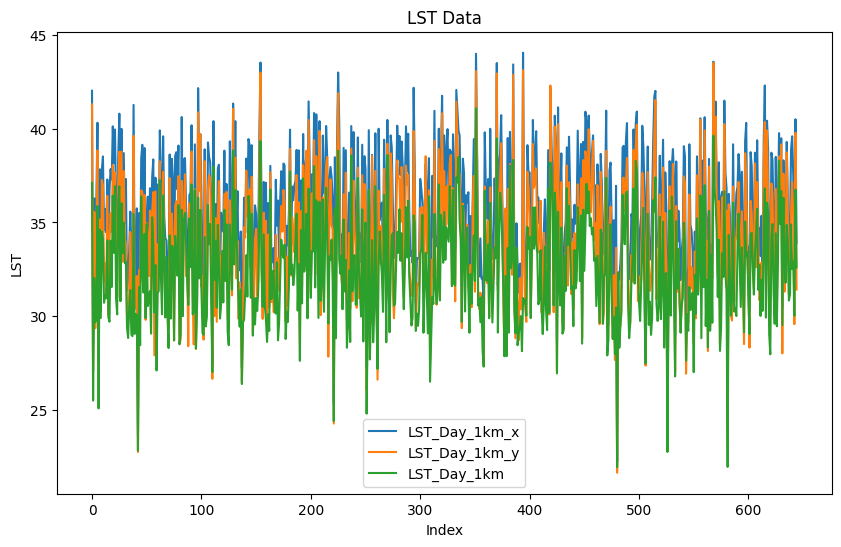

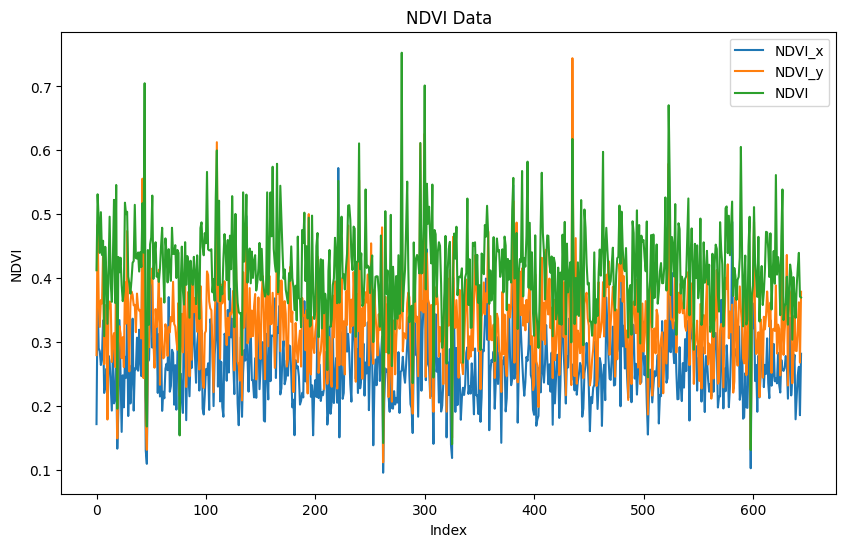

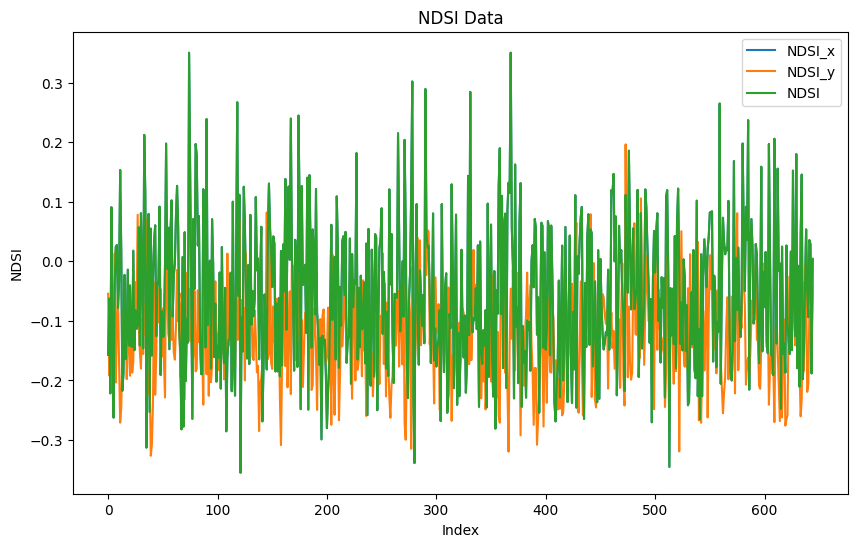

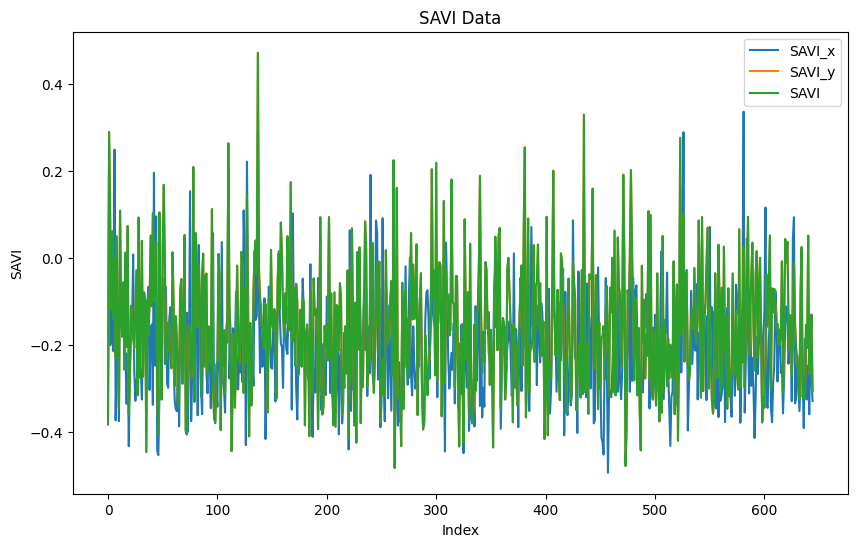

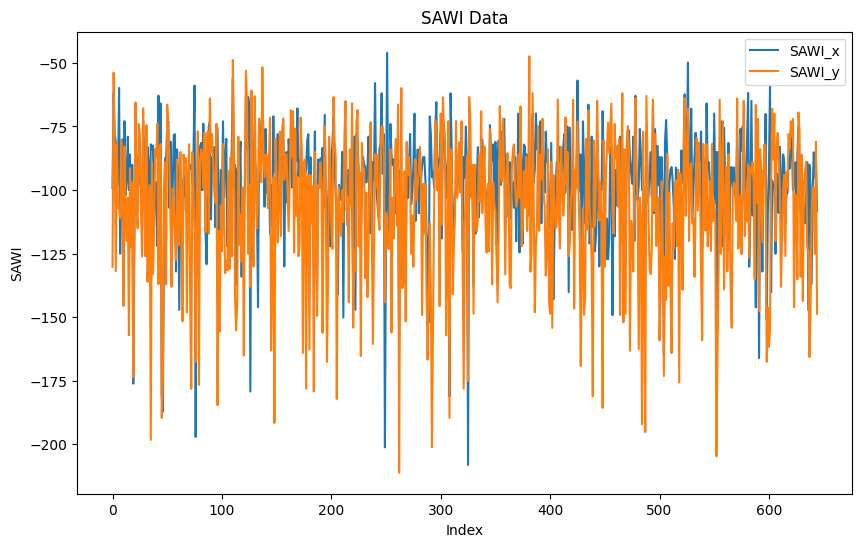

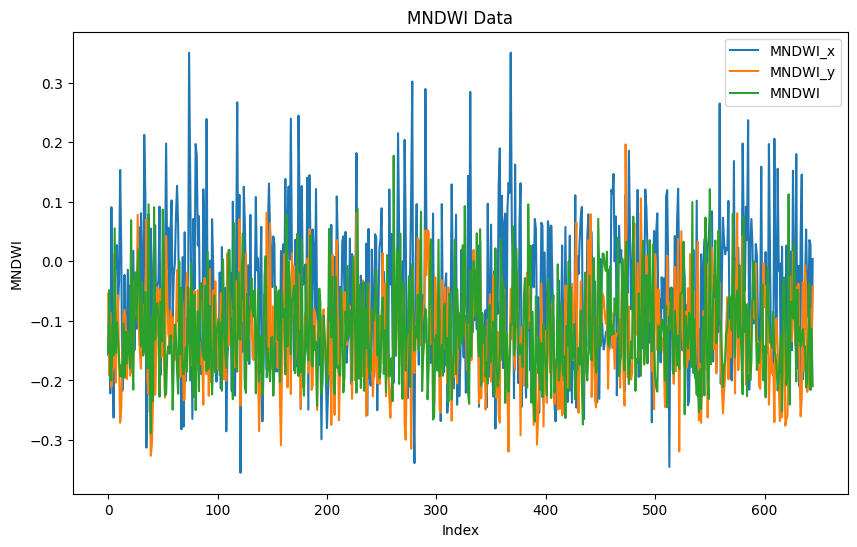

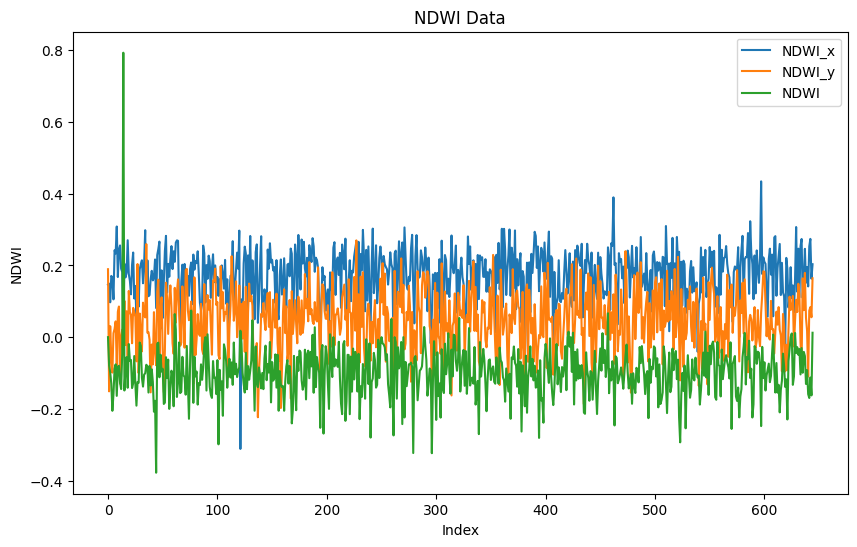

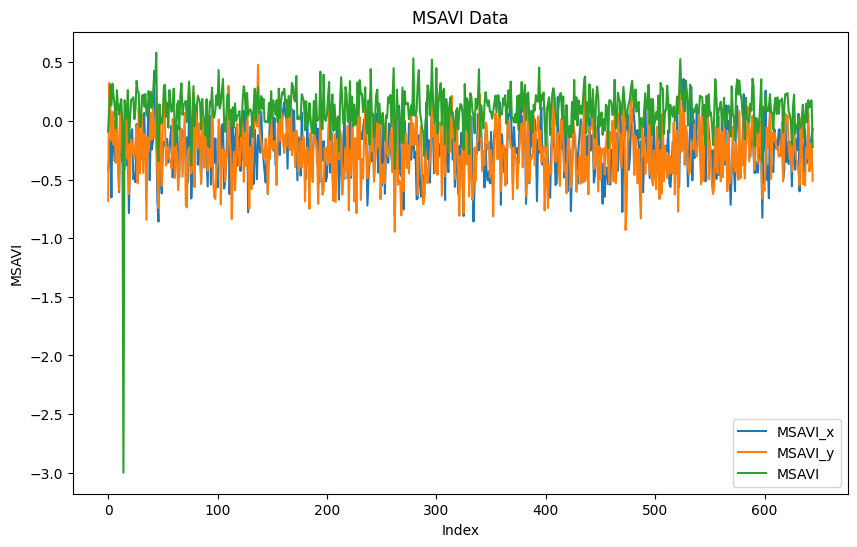

In [ ]:
import matplotlib.pyplot as plt

# Plotting LST data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['LST_Day_1km_x'], label='LST_Day_1km_x')
plt.plot(merged_df['LST_Day_1km_y'], label='LST_Day_1km_y')
plt.plot(merged_df['LST_Day_1km'], label='LST_Day_1km')
plt.xlabel('Index')
plt.ylabel('LST')
plt.title('LST Data')
plt.legend()
plt.show()

# Plotting NDVI data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['NDVI_x'], label='NDVI_x')
plt.plot(merged_df['NDVI_y'], label='NDVI_y')
plt.plot(merged_df['NDVI'], label='NDVI')
plt.xlabel('Index')
plt.ylabel('NDVI')
plt.title('NDVI Data')
plt.legend()
plt.show()

# Plotting NDSI data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['NDSI_x'], label='NDSI_x')
plt.plot(merged_df['NDSI_y'], label='NDSI_y')
plt.plot(merged_df['NDSI'], label='NDSI')
plt.xlabel('Index')
plt.ylabel('NDSI')
plt.title('NDSI Data')
plt.legend()
plt.show()

# Plotting SAVI data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['SAVI_x'], label='SAVI_x')
plt.plot(merged_df['SAVI_y'], label='SAVI_y')
plt.plot(merged_df['SAVI'], label='SAVI')
plt.xlabel('Index')
plt.ylabel('SAVI')
plt.title('SAVI Data')
plt.legend()
plt.show()

# Plotting SAWI data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['SAWI_x'], label='SAWI_x')
plt.plot(merged_df['SAWI_y'], label='SAWI_y')
plt.xlabel('Index')
plt.ylabel('SAWI')
plt.title('SAWI Data')
plt.legend()
plt.show()

# Plotting MNDWI data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['MNDWI_x'], label='MNDWI_x')
plt.plot(merged_df['MNDWI_y'], label='MNDWI_y')
plt.plot(merged_df['MNDWI'], label='MNDWI')
plt.xlabel('Index')
plt.ylabel('MNDWI')
plt.title('MNDWI Data')
plt.legend()
plt.show()

# Plotting NDWI data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['NDWI_x'], label='NDWI_x')
plt.plot(merged_df['NDWI_y'], label='NDWI_y')
plt.plot(merged_df['NDWI'], label='NDWI')
plt.xlabel('Index')
plt.ylabel('NDWI')
plt.title('NDWI Data')
plt.legend()
plt.show()

# Plotting MSAVI data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['MSAVI_x'], label='MSAVI_x')
plt.plot(merged_df['MSAVI_y'], label='MSAVI_y')
plt.plot(merged_df['MSAVI'], label='MSAVI')
plt.xlabel('Index')
plt.ylabel('MSAVI')
plt.title('MSAVI Data')
plt.legend()
plt.show()


<ipython-input-76-2fec49663f6e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


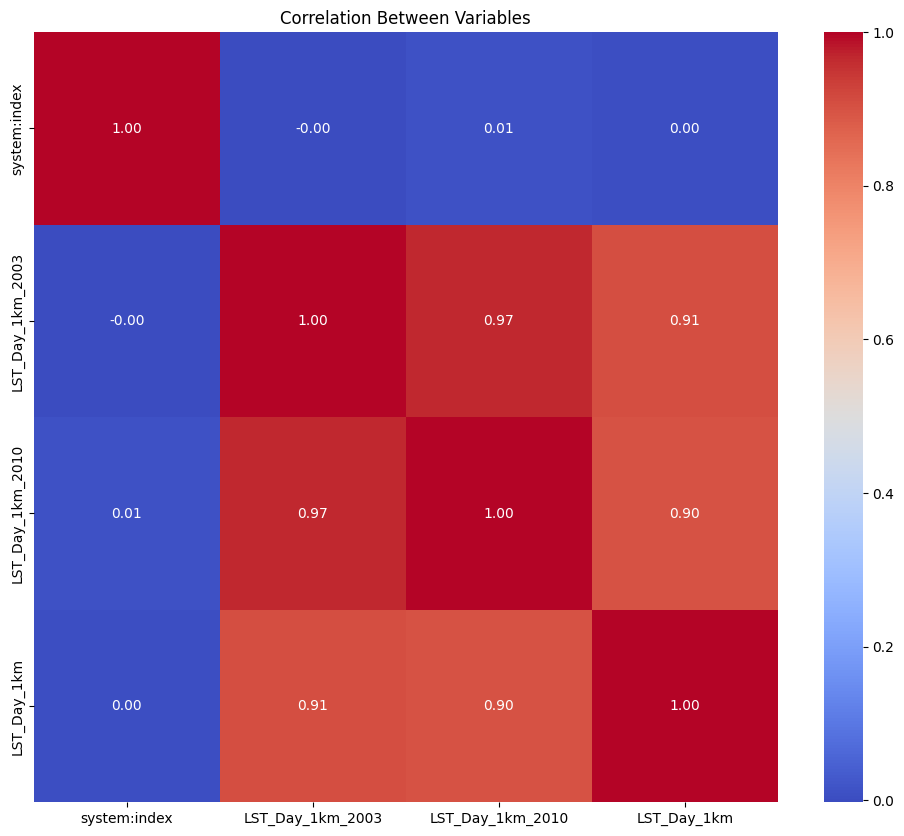

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()


In [ ]:
# Display the first few rows of each DataFrame to verify the data
print("First few rows of lst_df_2003:")
print(lst_df_2003.head())

# Repeat this process for other DataFrames
# ...

# Display the first few rows of other DataFrames


First few rows of lst_df_2003:
   system:index  LST_Day_1km  \
0             0    42.013870   
1             1    28.457985   
2             2    30.499702   
3             3    42.913623   
4             4    36.280258   

                                                .geo  
0  {"type":"Point","coordinates":[36.479341061885...  
1  {"type":"Point","coordinates":[36.642440198571...  
2  {"type":"Point","coordinates":[37.850000351582...  
3  {"type":"Point","coordinates":[36.122648193391...  
4  {"type":"Point","coordinates":[36.127947559352...  


In [ ]:
# Extract labels from the provided output
labels = combined_data[:, 0]

# Display the labels
print("Labels:", labels)

Labels: [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 

In [ ]:
# Drop object columns
X_train_numeric = X_train.select_dtypes(exclude=['object'])

# Train the classifier
xgb_classifier.fit(X_train_numeric, y_train_mapped)

# Make predictions
y_pred_train = xgb_classifier.predict(X_train_numeric)

# Evaluate the model
train_accuracy = accuracy_score(y_train_mapped, y_pred_train)
print("Training Accuracy:", train_accuracy)
print('Predictions', y_pred_train)


Training Accuracy: 0.0024449877750611247
Predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
# Display the first few rows of each DataFrame to verify the data
print("First few rows of lst_df_2003:")
print(lst_df_2003.head())

print("\nFirst few rows of ndvi_df_2000:")
print(ndvi_df_2000.head())

print("\nFirst few rows of ndsi_df_2000:")
print(ndsi_df_2000.head())

# Repeat this process for other DataFrames
# ...

# Display the first few rows of other DataFrames


First few rows of lst_df_2003:
   system:index  LST_Day_1km  \
0             0    42.013870   
1             1    28.457985   
2             2    30.499702   
3             3    42.913623   
4             4    36.280258   

                                                .geo  
0  {"type":"Point","coordinates":[36.479341061885...  
1  {"type":"Point","coordinates":[36.642440198571...  
2  {"type":"Point","coordinates":[37.850000351582...  
3  {"type":"Point","coordinates":[36.122648193391...  
4  {"type":"Point","coordinates":[36.127947559352...  

First few rows of ndvi_df_2000:
   system:index      NDVI                                               .geo
0             0  0.171184  {"type":"Point","coordinates":[36.479341061885...
1             1  0.374530  {"type":"Point","coordinates":[36.642440198571...
2             2  0.508304  {"type":"Point","coordinates":[37.850000351582...
3             3  0.204447  {"type":"Point","coordinates":[36.122648193391...
4             4  0.290032  {

In [ ]:
# Merge the DataFrames sequentially
merged_df = pd.merge(lst_df_2003, lst_df_2010, on='.geo', suffixes=('_2003', '_2010'))
merged_df = pd.merge(merged_df, lst_df_2020, on='.geo')

# Check for duplicate rows
duplicates = merged_df.duplicated()
if duplicates.any():
    print("Duplicate rows found. Removing duplicates...")
    merged_df = merged_df[~duplicates]

# Verify the number of rows after merging
expected_rows = len(lst_df_2003) + len(lst_df_2010) + len(lst_df_2020)
if len(merged_df) != expected_rows:
    print("Number of rows after merging does not match the expected sum of rows from individual DataFrames.")

# Print the first few rows of the merged DataFrame to inspect the data
print("First few rows of the merged DataFrame:")
print(merged_df.head())

# Assign the merged data to X_train
X_train = merged_df.values

# Print the shape of X_train to verify the number of samples
print("Shape of X_train:", X_train.shape)


Number of rows after merging does not match the expected sum of rows from individual DataFrames.
First few rows of the merged DataFrame:
   system:index_2003  LST_Day_1km_2003  \
0                  0         42.013870   
1                  1         28.457985   
2                  2         30.499702   
3                  3         42.913623   
4                  4         36.280258   

                                                .geo  system:index_2010  \
0  {"type":"Point","coordinates":[36.479341061885...                  0   
1  {"type":"Point","coordinates":[36.642440198571...                  1   
2  {"type":"Point","coordinates":[37.850000351582...                  2   
3  {"type":"Point","coordinates":[36.122648193391...                  3   
4  {"type":"Point","coordinates":[36.127947559352...                  4   

   LST_Day_1km_2010  system:index  LST_Day_1km  
0         41.283924             0    37.108710  
1         27.089559             1    25.506124  
2         29

In [ ]:
# Assuming you have loaded your training data into X_train and y_train

# Print the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check the number of samples in X_train and y_train
num_samples = X_train.shape[0]  # Assuming samples are along the first axis
print("Number of samples:", num_samples)


Shape of X_train: (640, 6)
Shape of y_train: (640,)
Number of samples: 640


In [ ]:
import pandas as pd

# Load individual DataFrames
lst_df_2003 = pd.read_csv('/content/LST_2003_CSV.csv')
lst_df_2010 = pd.read_csv('/content/LST_2010_CSV.csv')
lst_df_2020 = pd.read_csv('/content/LST_2020_CSV.csv')

# Check for duplicate rows in each DataFrame
print("Duplicates in lst_df_2003:", lst_df_2003.duplicated().sum())
print("Duplicates in lst_df_2010:", lst_df_2010.duplicated().sum())
print("Duplicates in lst_df_2020:", lst_df_2020.duplicated().sum())

# Merge DataFrames
merged_df = pd.merge(lst_df_2003, lst_df_2010, on='system:index', suffixes=('_2003', '_2010'))
merged_df = pd.merge(merged_df, lst_df_2020, on='system:index')

# Verify the shape and content of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)
print("First few rows of merged DataFrame:")
print(merged_df.head())
print(merged_df.columns)



Duplicates in lst_df_2003: 0
Duplicates in lst_df_2010: 0
Duplicates in lst_df_2020: 0
Shape of merged DataFrame: (1000, 7)
First few rows of merged DataFrame:
   system:index  LST_Day_1km_2003  \
0             0         42.013870   
1             1         28.457985   
2             2         30.499702   
3             3         42.913623   
4             4         36.280258   

                                           .geo_2003  LST_Day_1km_2010  \
0  {"type":"Point","coordinates":[36.479341061885...         41.283924   
1  {"type":"Point","coordinates":[36.642440198571...         27.089559   
2  {"type":"Point","coordinates":[37.850000351582...         29.235103   
3  {"type":"Point","coordinates":[36.122648193391...         41.355402   
4  {"type":"Point","coordinates":[36.127947559352...         35.552264   

                                           .geo_2010  LST_Day_1km  \
0  {"type":"Point","coordinates":[36.479341061885...    37.108710   
1  {"type":"Point","coordinates":[

In [ ]:
print(merged_df.columns)


Index(['system:index', 'LST_Day_1km_2003', '.geo_2003', 'LST_Day_1km_2010',
       '.geo_2010', 'LST_Day_1km', '.geo'],
      dtype='object')


In [ ]:
print(merged_df.columns)


Index(['system:index', 'LST_Day_1km_2003', '.geo_2003', 'LST_Day_1km_2010',
       '.geo_2010', 'LST_Day_1km', '.geo'],
      dtype='object')


In [ ]:
X = merged_df.drop(columns=['system:index'])


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'merged_data' contains your merged DataFrame
# Select only the numeric columns for preprocessing
numeric_columns = ['LST_Day_1km_2003', 'LST_Day_1km_2010', 'LST_Day_1km']

X_numeric = merged_df[numeric_columns]

# Choose one of the existing column names as the target column
y_column = 'LST_Day_1km_2010'

if y_column in merged_df.columns:
    y = merged_df[y_column]
else:
    raise KeyError(f"Column '{y_column}' not found in the DataFrame.")

# Convert any remaining non-numeric values to NaN
X_numeric = X_numeric.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X_numeric.dropna(inplace=True)

# Apply any necessary preprocessing steps
# For example, scaling numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now, X_train and X_test contain the preprocessed features, and y_train and y_test contain the corresponding labels
# You can proceed to train your model using X_train and y_train, and evaluate its performance on X_test and y_test


In [ ]:
import numpy as np

# Assuming all datasets have been merged and stored in merged_df

# Convert merged_df to numpy array
combined_data = merged_df.values

# Print the shape of the combined dataset
print("Combined dataset shape:", combined_data.shape)
print("Combined dataset:", combined_data)




Combined dataset shape: (1000, 7)
Combined dataset: [[0 42.01386958845541
  '{"type":"Point","coordinates":[36.47934106188542,-1.530799359456496]}'
  ...
  '{"type":"Point","coordinates":[36.47934106188542,-1.530799359456496]}'
  37.10870967741938
  '{"type":"Point","coordinates":[36.47934106188542,-1.530799359456496]}']
 [1 28.4579849340866
  '{"type":"Point","coordinates":[36.64244019857163,-1.3287753152207935]}'
  ...
  '{"type":"Point","coordinates":[36.64244019857163,-1.3287753152207935]}'
  25.506124031007776
  '{"type":"Point","coordinates":[36.64244019857163,-1.3287753152207935]}']
 [2 30.499702489374588
  '{"type":"Point","coordinates":[37.85000035158254,-2.7157063909981085]}'
  ...
  '{"type":"Point","coordinates":[37.85000035158254,-2.7157063909981085]}'
  29.610322580645192
  '{"type":"Point","coordinates":[37.85000035158254,-2.7157063909981085]}']
 ...
 [997 38.034069952305245
  '{"type":"Point","coordinates":[36.29174982429773,-1.3164867694242772]}'
  ...
  '{"type":"Poin

In [ ]:
# Extract labels from the provided output
labels = combined_data[:, 0]

# Display the labels
print("Labels:", labels)


Labels: [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 

In [ ]:
# Flatten the labels array
flattened_labels = labels.flatten()

# Display the flattened labels
print("Flattened Labels:", flattened_labels)


Flattened Labels: [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 26

In [ ]:
# Reshape the labels back to the original shape
reshaped_labels = labels.reshape(labels.shape[0], -1)

# Display the reshaped labels
print("Reshaped Labels:")



Reshaped Labels:


In [ ]:
# Function to normalize pixel values in a GeoTIFF file
def normalize_geotiff(combined_data):
    with rasterio.open(combined_data) as src:
        # Read data into numpy array
        data = src.read(1)  # Assuming single band GeoTIFFs

        # Compute min and max values
        min_val = np.min(data)
        max_val = np.max(data)

        # Normalize pixel values
        normalized_data = (data - min_val) / (max_val - min_val)

        return normalized_data

In [ ]:
def stack_geotiffs(combined_data):
    """
    Stacks and normalizes multiple GeoTIFF files.
    """
    stacked_data = np.dstack([normalize_geotiff(file) for file in combined_data])
    return stacked_data


In [ ]:
# Load the VGG16 model without the top (fully connected) layers
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers so they are not updated during training
for layer in vgg16_base.layers:
    layer.trainable = False

# Add custom top layers for classification
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)


In [ ]:
# Print the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check the number of samples in X_train and y_train
num_samples = X_train.shape[0]  # Assuming samples are along the first axis
print("Number of samples:", num_samples)

Shape of X_train: (800, 3)
Shape of y_train: (800,)
Number of samples: 800


In [ ]:
import numpy as np
import ast

# Define a function to convert string coordinates to numerical values
def convert_coordinates(coord_str):
    try:
        coord = ast.literal_eval(coord_str)
        if isinstance(coord, list) and len(coord) == 2:
            return coord[1], coord[0]  # Assuming it's latitude, longitude format
    except (SyntaxError, ValueError):
        pass
    return np.nan, np.nan  # Return NaN if parsing fails

# Apply the conversion function to each element in the appropriate column of X_train
X_train_lat, X_train_lon = np.vectorize(convert_coordinates)(X_train[..., 0])

# Update X_train with the converted values
X_train[..., 0] = X_train_lat
X_train[..., 1] = X_train_lon

# Remove rows where conversion failed (coordinates could not be parsed)
nan_indices = np.isnan(X_train_lat)
X_train = X_train[~nan_indices]

# Convert the entire X_train array to float32
X_train = X_train.astype(np.float32)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y contain your features and labels, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain 80% of the data for training
# and X_test and y_test contain 20% of the data for testing


In [ ]:
# Print the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check the number of samples in X_train and y_train
num_samples = X_train.shape[0]  # Assuming samples are along the first axis
print("Number of samples:", num_samples)

Shape of X_train: (0, 7)
Shape of y_train: (800,)
Number of samples: 0


In [ ]:
print("Object type of X_train:", type(X_train))
print("Object type of y_train:", type(y_train))


Object type of X_train: <class 'numpy.ndarray'>
Object type of y_train: <class 'numpy.ndarray'>


In [ ]:
def convert_to_numeric(value):
    if isinstance(value, str):
        # If the value is a string, try converting it to a float
        try:
            return float(value)
        except ValueError:
            # If conversion fails, return NaN (or any other suitable default value)
            return np.nan
    else:
        # If the value is not a string, return it unchanged
        return value


In [ ]:
import numpy as np

# Assuming X_train is your NumPy array

# Convert JSON strings to numeric values if applicable
def convert_to_numeric(value):
    try:
        # If the value is a string, attempt to convert it to float
        if isinstance(value, str):
            return float(value)
        # If it's not a string, return None
        return None
    except ValueError:
        # If conversion fails (e.g., for non-numeric strings), return None
        return None

# Apply the conversion function to each element in X_train using list comprehension
X_train_numeric = np.array([convert_to_numeric(value) for value in X_train])

# Filter out None values (failed conversions)
X_train_numeric = X_train_numeric[X_train_numeric != None]

# Convert X_train_numeric to float32
X_train_numeric = X_train_numeric.astype(np.float32)

# Check data types after conversion
print("X_train data type after conversion:", X_train_numeric.dtype)


X_train data type after conversion: float32


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming X_train is your numpy array with object data type

# Function to check if a value can be converted to float
def is_float(value):
    try:
        # Check if the value is a string
        if isinstance(value, str):
            # Attempt to convert the string to float
            float(value)
            return True
        else:
            return False
    except ValueError:
        return False

# Filter out the values that cannot be converted to float
X_train_numeric = np.array([value for value in X_train if is_float(value)])

# Convert X_train_numeric to a TensorFlow tensor
X_train_tensor = tf.convert_to_tensor(X_train_numeric, dtype=tf.float32)


In [ ]:
# Check the shape of X_train_tensor
print("Shape of X_train_tensor:", X_train_tensor.shape)

# Check the first few elements of X_train_tensor
print("First few elements of X_train_tensor:", X_train_tensor[:5])

# Check the shape of y_train
print("Shape of y_train:", y_train.shape)

# Check the first few elements of y_train
print("First few elements of y_train:", y_train[:5])


Shape of X_train_tensor: (0,)
First few elements of X_train_tensor: tf.Tensor([], shape=(0,), dtype=float32)
Shape of y_train: (800,)
First few elements of y_train: [29 535 695 557 836]


In [ ]:
# Filter out the values that cannot be converted to float
X_train_numeric = np.array([value for value in X_train if is_float(value)])

# Check the shape and contents of X_train_numeric
print("Shape of X_train_numeric:", X_train_numeric.shape)
print("First few elements of X_train_numeric:", X_train_numeric[:5])


Shape of X_train_numeric: (0,)
First few elements of X_train_numeric: []


In [ ]:
import numpy as np

# Function to check if a value can be converted to float
def is_float(value):
    try:
        # Attempt to convert the value to float
        float(value)
        return True
    except ValueError:
        return False

# Filter out the values that cannot be converted to float
X_train_numeric = np.array([value for value in X_train if is_float(value)])

# Convert X_train_numeric to float32
X_train_numeric = X_train_numeric.astype(np.float32)


In [ ]:
import numpy as np

# Function to check if a value can be converted to float
def is_float(value):
    try:
        # Attempt to convert the value to float
        float(value)
        return True
    except ValueError:
        return False

# Filter out the values that cannot be converted to float
X_train_numeric = np.array([value for value in X_train if is_float(value)])

# Convert X_train_numeric to float32
X_train_numeric = X_train_numeric.astype(np.float32)


In [ ]:
# Function to check if a value can be converted to float
def is_float(value):
    try:
        # Attempt to convert the value to float
        float(value)
        return True
    except ValueError:
        return False


In [1]:
import numpy as np

# Assuming X_train is your initial array

# Function to convert string values to numeric, returning NaN for non-convertible values
def convert_to_numeric(value):
    try:
        return float(value) if isinstance(value, str) else np.nan
    except ValueError:
        return np.nan

# Apply conversion function to each element in X_train
X_train_numeric = np.array([convert_to_numeric(value) for value in X_train])

# Filter out NaN values from X_train_numeric
X_train_numeric = X_train_numeric[~np.isnan(X_train_numeric)]

# Check if X_train_numeric is empty after filtering
if len(X_train_numeric) == 0:
    print("No valid numeric values found in X_train.")
else:
    # Convert X_train_numeric to float32
    X_train_numeric = X_train_numeric.astype(np.float32)
    print("Successfully converted X_train to numeric format.")

# Proceed with further preprocessing or data manipulation


NameError: name 'X_train' is not defined